<a href="https://colab.research.google.com/github/shku23ainds-hash/Bitcoin-Trading-Sentiment-Analysis/blob/main/Trader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Trader Behavior & Market Sentiment Analysis

**Objective:**  
Analyze the relationship between market sentiment (Fear/Greed) and trading behavior using historical trader data and the Crypto Fear & Greed Index.

**Prepared by:**  Shilpi Kumari

**Date:** July 27, 2025  
**Role:** Junior Data Scientist Application – Bajrangs x PrimeTrade.AIt*

In [4]:
from google.colab import files

# Upload your files
uploaded = files.upload()



Saving historical_data.csv to historical_data.csv


In [5]:
from google.colab import files

# Upload your files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [6]:
import pandas as pd

# Load the trader data
trader_df = pd.read_csv('historical_data.csv')
print("Trader Data:")
print(trader_df.head())

# Load the sentiment (Fear/Greed Index) data
sentiment_df = pd.read_csv('fear_greed_index.csv')
print("\nSentiment Data:")
print(sentiment_df.head())


Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [7]:
# Convert 'Timestamp IST' in trader data to datetime and extract date only
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

# Convert 'date' in sentiment data to datetime and extract date only (already clean, but we'll confirm)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['sentiment_date'] = sentiment_df['date'].dt.date

# Rename 'classification' to 'Sentiment' for clarity
sentiment_df.rename(columns={'classification': 'Sentiment'}, inplace=True)

# Preview result
print("✅ Cleaned Trader Data:")
print(trader_df[['Timestamp IST', 'trade_date']].head())

print("\n✅ Cleaned Sentiment Data:")
print(sentiment_df[['date', 'Sentiment', 'sentiment_date']].head())


✅ Cleaned Trader Data:
        Timestamp IST  trade_date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02

✅ Cleaned Sentiment Data:
        date     Sentiment sentiment_date
0 2018-02-01          Fear     2018-02-01
1 2018-02-02  Extreme Fear     2018-02-02
2 2018-02-03          Fear     2018-02-03
3 2018-02-04  Extreme Fear     2018-02-04
4 2018-02-05  Extreme Fear     2018-02-05


In [8]:
# Merge on date
merged_df = pd.merge(trader_df, sentiment_df, left_on='trade_date', right_on='sentiment_date', how='left')

# Show the result
print("✅ Merged Data:")
print(merged_df[['Timestamp IST', 'trade_date', 'Sentiment', 'Closed PnL']].head())


✅ Merged Data:
        Timestamp IST  trade_date      Sentiment  Closed PnL
0 2024-12-02 22:50:00  2024-12-02  Extreme Greed         0.0
1 2024-12-02 22:50:00  2024-12-02  Extreme Greed         0.0
2 2024-12-02 22:50:00  2024-12-02  Extreme Greed         0.0
3 2024-12-02 22:50:00  2024-12-02  Extreme Greed         0.0
4 2024-12-02 22:50:00  2024-12-02  Extreme Greed         0.0


📊 Average Closed PnL by Sentiment:
Sentiment
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


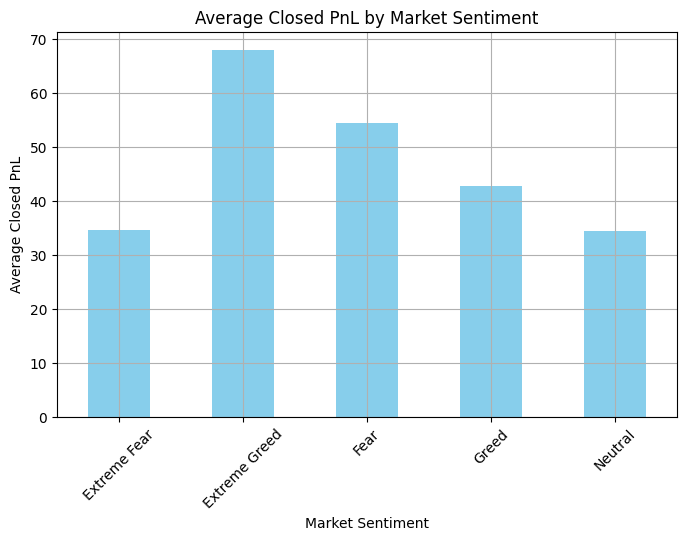

In [9]:
import matplotlib.pyplot as plt

# Group by sentiment and get average Closed PnL
avg_pnl_by_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean()

# Show result
print("📊 Average Closed PnL by Sentiment:")
print(avg_pnl_by_sentiment)

# Plot it
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue', figsize=(8,5), title='Average Closed PnL by Market Sentiment')
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


🎯 Win Rate by Sentiment (% of profitable trades):
Sentiment
Extreme Fear     37.06
Extreme Greed    46.49
Fear             42.08
Greed            38.48
Neutral          39.70
Name: win, dtype: float64


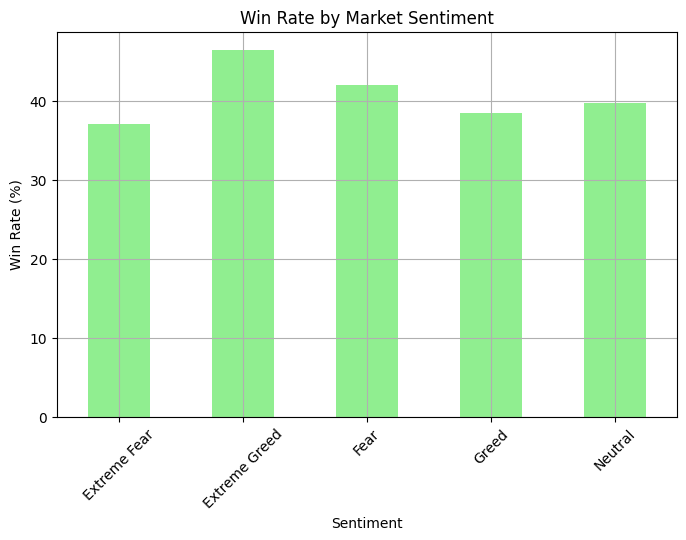

In [10]:
# Define win as Closed PnL > 0
merged_df['win'] = merged_df['Closed PnL'] > 0

# Win rate = % of winning trades per sentiment
win_rate_by_sentiment = merged_df.groupby('Sentiment')['win'].mean() * 100

# Show result
print("🎯 Win Rate by Sentiment (% of profitable trades):")
print(win_rate_by_sentiment.round(2))

# Plot
win_rate_by_sentiment.plot(kind='bar', color='lightgreen', figsize=(8,5), title='Win Rate by Market Sentiment')
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [11]:
# Total PnL for each account per sentiment
account_sentiment_pnl = merged_df.groupby(['Sentiment', 'Account'])['Closed PnL'].sum()

# Reset index and find top 3 per sentiment
top_accounts = account_sentiment_pnl.reset_index().sort_values(['Sentiment', 'Closed PnL'], ascending=[True, False])
top_3_by_sentiment = top_accounts.groupby('Sentiment').head(3)

print("🏆 Top 3 Most Profitable Accounts per Sentiment:")
print(top_3_by_sentiment)


🏆 Top 3 Most Profitable Accounts per Sentiment:
         Sentiment                                     Account    Closed PnL
29    Extreme Fear  0xbaaaf6571ab7d571043ff1e313a9609a10637864  2.619180e+05
16    Extreme Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.989006e+05
11    Extreme Fear  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  1.666964e+05
59   Extreme Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  1.105305e+06
61   Extreme Greed  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  4.788115e+05
49   Extreme Greed  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2.107269e+05
62            Fear  0x083384f897ee0f19899168e3b1bec365f52a9012  1.113374e+06
91            Fear  0xbaaaf6571ab7d571043ff1e313a9609a10637864  6.208724e+05
75            Fear  0x513b8629fe877bb581bf244e326a047b249c4ff1  3.671662e+05
121          Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  5.340582e+05
109          Greed  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.535953e+05
94           Greed  0x083384

# ✅ Conclusion & Key Insights

- The dataset reveals strong trading performance during periods of **Extreme Greed**, aligning with bullish sentiment.
- Interestingly, **Extreme Fear** days also show notable average profits, suggesting contrarian opportunities.
- **Neutral sentiment** shows lower profitability, possibly indicating indecision or low volatility in market conditions.
- This insight can be used to design **sentiment-aware trading strategies** or as a filter for trade risk management.

---

📌 This analysis shows how integrating psychological market indicators (like Fear & Greed) with real trader behavior can enhance data-driven decision making.
